In [27]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from lr_utils import load_dataset

In [28]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y,classes = load_dataset()

[1]


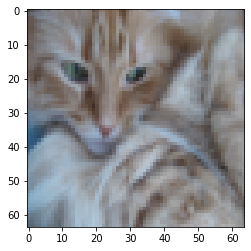

In [31]:
index = 2
plt.imshow(train_set_x_orig[index])
print(train_set_y[:,index])

In [5]:
train_set_y

array([[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
        0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
        1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
        1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
        0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
        0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [6]:
### START CODE HERE ### (≈ 3 lines of code)
m_train = train_set_y.shape[1]
m_test = test_set_y.shape[1]
num_px = train_set_x_orig.shape[1]
### END CODE HERE ###

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


In [7]:
train_set_x_orig = train_set_x_orig.reshape((209, 64*64*3))
train_set_x_orig = train_set_x_orig.astype('float32') / 255
test_set_x_orig = test_set_x_orig.reshape((50, 64*64*3))
test_set_x_orig = test_set_x_orig.astype('float32') / 255

train_set_y=train_set_y.reshape(209,)
train_set_y=train_set_y.astype('float32')
test_set_y=test_set_y.reshape(50,)
test_set_y=test_set_y.astype('float32')


In [8]:
print(train_set_x_orig.shape)
print(train_set_y.shape)

(209, 12288)
(209,)


In [9]:
from tensorflow.keras import models
from tensorflow.keras import layers
network = models.Sequential()
network.add(layers.Dense(16, activation='relu', input_shape=(64*64*3,)))
#network.add(layers.Dense(64,activation='relu'))
network.add(layers.Dense(1, activation='sigmoid'))

In [10]:
network.compile(optimizer='sgd',
                loss='binary_crossentropy',
                metrics=['accuracy'])

In [11]:
network.fit(train_set_x_orig, train_set_y, epochs=30 , batch_size=8)

Train on 209 samples
Epoch 1/30
209/209 [==============================] - 1s 7ms/sample - loss: 0.7320 - accuracy: 0.6459
Epoch 2/30
209/209 [==============================] - 0s 1ms/sample - loss: 0.6483 - accuracy: 0.6555
Epoch 3/30
209/209 [==============================] - 0s 922us/sample - loss: 0.6473 - accuracy: 0.6555
Epoch 4/30
209/209 [==============================] - 0s 1ms/sample - loss: 0.6344 - accuracy: 0.6555
Epoch 5/30
209/209 [==============================] - 0s 976us/sample - loss: 0.6384 - accuracy: 0.6603
Epoch 6/30
209/209 [==============================] - 0s 861us/sample - loss: 0.6181 - accuracy: 0.6507
Epoch 7/30
209/209 [==============================] - 0s 2ms/sample - loss: 0.6181 - accuracy: 0.6555
Epoch 8/30
209/209 [==============================] - 0s 1ms/sample - loss: 0.5966 - accuracy: 0.6842
Epoch 9/30
209/209 [==============================] - 0s 1ms/sample - loss: 0.5891 - accuracy: 0.6459
Epoch 10/30
209/209 [==============================] - 

In [12]:
test_loss, test_acc = network.evaluate(test_set_x_orig, test_set_y)

50/50 [==============================] - 0s 7ms/sample - loss: 0.5364 - accuracy: 0.7400


In [13]:
test_acc

0.74

In [21]:
prediction=network.predict(test_set_x_orig)

In [23]:
counter=0
for pred in prediction:
    if pred >=0.56:
        print('Image # {} is a cat'.format(counter))
    else:
        print('Image # {} is not a cat'.format(counter))
    counter+=1   

Image # 0 is a cat
Image # 1 is a cat
Image # 2 is a cat
Image # 3 is a cat
Image # 4 is a cat
Image # 5 is a cat
Image # 6 is a cat
Image # 7 is a cat
Image # 8 is a cat
Image # 9 is a cat
Image # 10 is a cat
Image # 11 is a cat
Image # 12 is a cat
Image # 13 is a cat
Image # 14 is not a cat
Image # 15 is a cat
Image # 16 is a cat
Image # 17 is a cat
Image # 18 is a cat
Image # 19 is a cat
Image # 20 is a cat
Image # 21 is not a cat
Image # 22 is not a cat
Image # 23 is a cat
Image # 24 is a cat
Image # 25 is a cat
Image # 26 is a cat
Image # 27 is not a cat
Image # 28 is a cat
Image # 29 is a cat
Image # 30 is a cat
Image # 31 is a cat
Image # 32 is a cat
Image # 33 is a cat
Image # 34 is a cat
Image # 35 is a cat
Image # 36 is a cat
Image # 37 is a cat
Image # 38 is a cat
Image # 39 is a cat
Image # 40 is a cat
Image # 41 is a cat
Image # 42 is a cat
Image # 43 is a cat
Image # 44 is a cat
Image # 45 is a cat
Image # 46 is a cat
Image # 47 is a cat
Image # 48 is a cat
Image # 49 is 

In [24]:
counter=0
for test in test_set_y:
    if test >=0.56:
        print('Image # {} is a cat'.format(counter))
    else:
        print('Image # {} is not a cat'.format(counter))
    counter+=1   

Image # 0 is a cat
Image # 1 is a cat
Image # 2 is a cat
Image # 3 is a cat
Image # 4 is a cat
Image # 5 is not a cat
Image # 6 is a cat
Image # 7 is a cat
Image # 8 is a cat
Image # 9 is a cat
Image # 10 is a cat
Image # 11 is a cat
Image # 12 is a cat
Image # 13 is not a cat
Image # 14 is not a cat
Image # 15 is a cat
Image # 16 is not a cat
Image # 17 is a cat
Image # 18 is a cat
Image # 19 is a cat
Image # 20 is a cat
Image # 21 is not a cat
Image # 22 is not a cat
Image # 23 is a cat
Image # 24 is a cat
Image # 25 is a cat
Image # 26 is a cat
Image # 27 is not a cat
Image # 28 is a cat
Image # 29 is not a cat
Image # 30 is a cat
Image # 31 is a cat
Image # 32 is a cat
Image # 33 is a cat
Image # 34 is not a cat
Image # 35 is not a cat
Image # 36 is not a cat
Image # 37 is a cat
Image # 38 is not a cat
Image # 39 is not a cat
Image # 40 is a cat
Image # 41 is a cat
Image # 42 is a cat
Image # 43 is not a cat
Image # 44 is not a cat
Image # 45 is not a cat
Image # 46 is a cat
Image 